<div style="border-radius: 10px; padding: 15px;
background-color: #C02929; font-size:110%;
text-align:left">

<h2 align="center"><font color=white>SUPERMARKET GROCERY STORE - CUSTOMER SEGMENTATION USING MACHINE LEARNING K-MEANS ELBOW METHOD
</font></h2>

<h4> TEAM 11: </h4>

* Mokhamad Susmana
* Fathimah Ella Syarif

<h2> Data Source: </h2>

*   [grocery_sales.db](https://drive.google.com/file/d/1HeRKLWVMRnL0FaGlStWT6SZwYZUjmx2f/view)



## 📦 Import Libraries

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 🗂️ Load and Inspect Database

In [ ]:
GROCERY_DATA = '/content/grocery_sales.db'

# Koneksi db
db = sqlite3.connect(GROCERY_DATA)

# Kursor eksekusi
cursor = db.cursor()


query = """
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';
"""

cursor.execute(query)
print("Available tables:", cursor.fetchall())

Available tables: [('order',), ('category',), ('customer',), ('merchant',)]


## 🧾 Load Data from 'Order'

In [ ]:
# Menampilkan data order
df_order = """SELECT * from 'order' """

df = pd.read_sql_query(df_order, db)
df_order

"SELECT * from 'order' "

In [ ]:
df_order = pd.read_sql_query("SELECT * FROM 'order'", db)
df_order

,order_id,customer_id,cat_id,merchant_id,order_date,sales,discount,profit
0,OD1,C0013,OM1,M0085,2017-08-11 00:00:00,1254,0.12,401.28
1,OD2,C0038,BV1,M0033,2015-09-06 00:00:00,749,0.18,149.8
2,OD3,C0015,FG1,M0053,2019-05-08,2360,0.21,165.2
3,OD4,C0016,FV1,M0017,2018-04-10,896,0.25,89.6
4,OD5,C0029,FG2,M0049,2017-10-11 00:00:00,2355,0.26,918.45
...,...,...,...,...,...,...,...,...
9999,OD9990,C0037,E1,M0039,2016-12-12,945,0.16,359.1
10000,OD9991,C0004,B1,M0025,2015-12-07 00:00:00,1195,0.26,71.7
10001,OD9992,C0028,FG4,M0001,2017-06-06 00:00:00,1567,0.16,501.44
10002,OD9993,C0025,OM3,M0058,2019-04-10,1659,0.15,597.24


In [ ]:
df_category = pd.read_sql_query("SELECT * FROM 'category'", db)
df_category

,id,category,sub_category
0,S1,Snacks,Chocolates
1,S2,Snacks,Cookies
2,S3,Snacks,Noodles
3,OM1,Oil & Masala,Masalas
4,OM2,Oil & Masala,Edible Oil & Ghee
5,OM3,Oil & Masala,Spices
6,FV1,Fruits & Veggies,Fresh Vegetables
7,FV2,Fruits & Veggies,Fresh Fruits
8,FV3,Fruits & Veggies,Organic Vegetables
9,FV4,Fruits & Veggies,Organic Fruits


In [ ]:
df_customer = pd.read_sql_query("SELECT * FROM 'customer'", db)

df_merchant = pd.read_sql_query("SELECT * FROM 'merchant'", db)

## 🧹 **Data Cleaning**

In [ ]:
# Cek kolom yang ada di df_order
df_order.columns

Index(['order_id', 'customer_id', 'cat_id', 'merchant_id', 'order_date',
       'sales', 'discount', 'profit'],
      dtype='object')

In [ ]:
# Cek tipe data di df_order
print("Tipe Data Sebelum Cleaning:")
df_order.dtypes

Tipe Data Sebelum Cleaning:


,0
order_id,object
customer_id,object
cat_id,object
merchant_id,object
order_date,object
sales,object
discount,object
profit,object


### Cek 'order_date' (datetime)

In [ ]:
print("CEK KESESUAIAN TAHUN BULAN TANGGAL pada 'order_date' SEBELUM CLEANING")

# Konversi ke datetime dengan format spesifik
valid_dates = pd.to_datetime(df_order['order_date'], format='%Y-%m-%d', errors='coerce')

# Hitung jumlah valid dan tidak valid
valid_count = valid_dates.notna().sum()
invalid_count = valid_dates.isna().sum()

# Tampilkan hasil
print(f"Jumlah format tahun-bulan-tanggal yang valid: {valid_count}")
print(f"Jumlah format tahun-bulan-tanggal yang TIDAK valid: {invalid_count}")

# Tampilkan head data invalid
if invalid_count > 0:
    print("\nContoh data yang TIDAK valid:")
    print(df_order.loc[valid_dates.isna(), 'order_date'].head().to_string(index=False))

CEK KESESUAIAN TAHUN BULAN TANGGAL pada 'order_date' SEBELUM CLEANING
Jumlah format tahun-bulan-tanggal yang valid: 5952
Jumlah format tahun-bulan-tanggal yang TIDAK valid: 4052

Contoh data yang TIDAK valid:
2017-08-11 00:00:00
2015-09-06 00:00:00
2017-10-11 00:00:00
2016-07-08 00:00:00
2017-01-10 00:00:00


In [ ]:
# Konversi kolom ke string dan hilangkan spasi
order_dates = df_order['order_date'].astype(str).str.strip()

# Format benar: YYYY-MM-DD (10 karakter, tidak mengandung jam)
correct_format = df_order[order_dates.str.match(r'^\d{4}-\d{2}-\d{2}$')]

# Format datetime: YYYY-MM-DD HH:MM:SS
datetime_format = df_order[order_dates.str.match(r'^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$')]

# Format DD/MM/YYYY
ddmmyyyy_slash_format = df_order[order_dates.str.match(r'^\d{2}/\d{2}/\d{4}$')]

# Format DD-MM-YYYY
ddmmyyyy_format = df_order[order_dates.str.match(r'^\d{2}-\d{2}-\d{4}$')]

# Format YYYY/MM/DD
yyyymmdd_slash_format = df_order[order_dates.str.match(r'^\d{4}/\d{2}/\d{2}$')]

# Jumlah Null
kosong = df_order['order_date'].isnull().sum()

# Jumlah Dash
dash = (df_order['order_date'] == '-').sum()

# Total data
total = len(df_order)

print("KATEGORI FORMAT TANGGAL:\n")
print(f"Benar (YYYY-MM-DD): {len(correct_format)}")
print(f"Datetime (YYYY-MM-DD HH:MM:SS): {len(datetime_format)}")
print(f"DD/MM/YYYY: {len(ddmmyyyy_slash_format)}")
print(f"DD-MM-YYYY: {len(ddmmyyyy_format)}")
print(f"YYYY/MM/DD: {len(yyyymmdd_slash_format)}")
print(f"Jumlah NULL: {kosong}")
print(f"Jumlah Dash: {dash}")
print(f"Total baris: {total}")

KATEGORI FORMAT TANGGAL:

Benar (YYYY-MM-DD): 5952
Datetime (YYYY-MM-DD HH:MM:SS): 4042
DD/MM/YYYY: 0
DD-MM-YYYY: 4
YYYY/MM/DD: 0
Jumlah NULL: 3
Jumlah Dash: 3
Total baris: 10004


### Cek 'sales', 'discount', 'profit' (numeric)

In [ ]:
print("CEK KESESUAIAN NUMERIC PADA 'sales', 'discount', 'profit' SEBELUM CLEANING")

# Misalkan df_order adalah DataFrame yang berisi tabel order
df_order['sales'] = pd.to_numeric(df_order['sales'], errors='coerce')
df_order['discount'] = pd.to_numeric(df_order['discount'], errors='coerce')
df_order['profit'] = pd.to_numeric(df_order['profit'], errors='coerce')

# Hitung jumlah data yang valid dan tidak valid
valid_sales = df_order['sales'].notna().sum()
invalid_sales = df_order['sales'].isna().sum()

valid_discount = df_order['discount'].notna().sum()
invalid_discount = df_order['discount'].isna().sum()

valid_profit = df_order['profit'].notna().sum()
invalid_profit = df_order['profit'].isna().sum()

print(f"Jumlah data sales yang valid: {valid_sales}")
print(f"Jumlah data sales yang TIDAK valid: {invalid_sales}")

print(f"\nJumlah data discount yang valid: {valid_discount}")
print(f"Jumlah data discount yang TIDAK valid: {invalid_discount}")

print(f"\nJumlah data profit yang valid: {valid_profit}")
print(f"Jumlah data profit yang TIDAK valid: {invalid_profit}")

CEK KESESUAIAN NUMERIC PADA 'sales', 'discount', 'profit' SEBELUM CLEANING
Jumlah data sales yang valid: 9996
Jumlah data sales yang TIDAK valid: 8

Jumlah data discount yang valid: 9982
Jumlah data discount yang TIDAK valid: 22

Jumlah data profit yang valid: 9985
Jumlah data profit yang TIDAK valid: 19


In [ ]:
print("CEK JUMLAH YANG BUKAN NUMERIC")

# Kolom SALES
print("\nKolom sales")

null_sales = df_order['sales'].isna().sum()
dash_sales = (df_order['sales'] == '-').sum()
datetime_sales = pd.to_datetime(df_order['sales'], errors='coerce').notna() & ~pd.to_numeric(df_order['sales'], errors='coerce').notna()
datetime_sales_count = datetime_sales.sum()
total_invalid_sales = null_sales + dash_sales + datetime_sales_count

print(f"- Jumlah NULL: {null_sales}")
print(f"- Jumlah '-': {dash_sales}")
print(f"- Jumlah yang datetime: {datetime_sales_count}")
print(f"- Jumlah total tidak numerik: {total_invalid_sales}")

# Kolom DISCOUNT
print("\nKolom discount")

null_discount = df_order['discount'].isna().sum()
dash_discount = (df_order['discount'] == '-').sum()
datetime_discount = pd.to_datetime(df_order['discount'], errors='coerce').notna() & ~pd.to_numeric(df_order['discount'], errors='coerce').notna()
datetime_discount_count = datetime_discount.sum()
total_invalid_discount = null_discount + dash_discount + datetime_discount_count

print(f"- Jumlah NULL: {null_discount}")
print(f"- Jumlah '-': {dash_discount}")
print(f"- Jumlah yang datetime: {datetime_discount_count}")
print(f"- Jumlah total tidak numerik: {total_invalid_discount}")

# Kolom PROFIT
print("\nKolom profit")

null_profit = df_order['profit'].isna().sum()
dash_profit = (df_order['profit'] == '-').sum()
datetime_profit = pd.to_datetime(df_order['profit'], errors='coerce').notna() & ~pd.to_numeric(df_order['profit'], errors='coerce').notna()
datetime_profit_count = datetime_profit.sum()
total_invalid_profit = null_profit + dash_profit + datetime_profit_count

print(f"- Jumlah NULL: {null_profit}")
print(f"- Jumlah '-': {dash_profit}")
print(f"- Jumlah yang datetime: {datetime_profit_count}")
print(f"- Jumlah total tidak numerik: {total_invalid_profit}")

CEK JUMLAH YANG BUKAN NUMERIC

Kolom sales
- Jumlah NULL: 8
- Jumlah '-': 0
- Jumlah yang datetime: 0
- Jumlah total tidak numerik: 8

Kolom discount
- Jumlah NULL: 22
- Jumlah '-': 0
- Jumlah yang datetime: 0
- Jumlah total tidak numerik: 22

Kolom profit
- Jumlah NULL: 19
- Jumlah '-': 0
- Jumlah yang datetime: 0
- Jumlah total tidak numerik: 19


###Cek Duplikat

In [ ]:
# Cek jumlah duplikat sebelum dihapus
print("Jumlah baris duplikat sebelum dihapus:", df_order.duplicated().sum())

Jumlah baris duplikat sebelum dihapus: 10


In [ ]:
# Lihat data duplikasi yang ada
dup_after_query = """
SELECT order_id,
  COUNT(*) as jumlah_duplikat
  FROM 'order'
  GROUP BY order_id
  HAVING COUNT(*) > 1;
"""
print("\nTampilkan Duplikasi pada order_id:")
display(pd.read_sql_query(dup_after_query, db))



Tampilkan Duplikasi pada order_id:


,order_id,jumlah_duplikat
0,OD9448,2
1,OD9449,2
2,OD9636,2
3,OD9637,2
4,OD9638,2
5,OD9639,2
6,OD9691,2
7,OD9692,2
8,OD9925,2
9,OD9983,2


### Penghapusan

In [ ]:
# Copy dataframe untuk mencegah modifikasi data asli
order_clean = df_order.copy()

# Ganti '-' di kolom order_date jadi NaN
order_clean['order_date'] = order_clean['order_date'].replace('-', np.nan)
order_clean

# Konversi order_date ke datetime (format campuran), error jadi NaT
order_clean['order_date'] = pd.to_datetime(order_clean['order_date'], format='mixed', errors='coerce')

# Konversi kolom numerik ke float (sales, discount, profit), error jadi NaN
order_clean['sales'] = pd.to_numeric(order_clean['sales'], errors='coerce')
order_clean['discount'] = pd.to_numeric(order_clean['discount'], errors='coerce')
order_clean['profit'] = pd.to_numeric(order_clean['profit'], errors='coerce')

# Drop semua null value kolom sales, discount, profit
order_clean = order_clean.dropna(subset=['order_date', 'sales', 'discount', 'profit'])

# Hapus baris duplikat
order_clean = order_clean.drop_duplicates()
df.drop_duplicates(inplace=True)

# Reset index
order_clean.reset_index(drop=True, inplace=True)

# Tampilkan informasi hasil cleaning
print(f"\nTipe Data Setelah cleaning:")
print(order_clean[['order_date', 'sales', 'discount', 'profit']].dtypes)
print(f"\nSample data:")
print(order_clean[['order_date', 'sales', 'discount', 'profit']].head())


Tipe Data Setelah cleaning:
order_date    datetime64[ns]
sales                float64
discount             float64
profit               float64
dtype: object

Sample data:
  order_date   sales  discount  profit
0 2017-08-11  1254.0      0.12  401.28
1 2015-09-06   749.0      0.18  149.80
2 2019-05-08  2360.0      0.21  165.20
3 2018-04-10   896.0      0.25   89.60
4 2017-10-11  2355.0      0.26  918.45


### Verifikasi tabel order_clean

In [ ]:
# Cek tipe data order_clean
print("Tipe Data Setelah Cleaning:")
order_clean.dtypes

Tipe Data Setelah Cleaning:


,0
order_id,object
customer_id,object
cat_id,object
merchant_id,object
order_date,datetime64[ns]
sales,float64
discount,float64
profit,float64


In [ ]:
# Cek jumlah duplikat setelah dihapus
print("Jumlah baris duplikat setelah dihapus:", order_clean.duplicated().sum())

Jumlah baris duplikat setelah dihapus: 0


In [ ]:
# Cek sample duplicate
order_clean.loc[order_clean['order_id'] == 'OD9449']


,order_id,customer_id,cat_id,merchant_id,order_date,sales,discount,profit
9397,OD9449,C0008,B1,M0008,2017-05-05,654.0,0.35,111.18


In [ ]:
# Cek jumlah baris sebelum dan sesudah cleaning
before_cleaning = df_order.shape[0]
after_cleaning = order_clean.shape[0]
rows_deleted = before_cleaning - after_cleaning

# Hitung persentase baris yang dihapus
percentage_deleted = (rows_deleted / before_cleaning) * 100

# Tampilkan ringkasan
print("Data Cleaning Summary")
print("=" * 50)
print(f"Sebelum cleaning: {df_order.shape}")
print(f"Setelah cleaning: {order_clean.shape}")
print(f"Jumlah baris yang dihapus: {rows_deleted}")
print(f"Persentase baris yang dihapus: {percentage_deleted:.2f}%")

Data Cleaning Summary
Sebelum cleaning: (10004, 8)
Setelah cleaning: (9939, 8)
Jumlah baris yang dihapus: 65
Persentase baris yang dihapus: 0.65%


In [ ]:
print("CEK KESESUAIAN TAHUN BULAN TANGGAL pada 'order_date' SETELAH CLEANING")

# Konversi ke datetime dengan format spesifik
valid_dates = pd.to_datetime(order_clean['order_date'], format='%Y-%m-%d', errors='coerce')

# Hitung jumlah valid dan tidak valid
valid_count = valid_dates.notna().sum()
invalid_count = valid_dates.isna().sum()

# Tampilkan hasil
print(f"Jumlah format tahun-bulan-tanggal yang valid: {valid_count}")
print(f"Jumlah format tahun-bulan-tanggal yang TIDAK valid: {invalid_count}")

# Tampilkan head data invalid
if invalid_count > 0:
    print("\nContoh data yang TIDAK valid:")
    print(df.loc[valid_dates.isna(), 'order_date'].head().to_string(index=False))

CEK KESESUAIAN TAHUN BULAN TANGGAL pada 'order_date' SETELAH CLEANING
Jumlah format tahun-bulan-tanggal yang valid: 9939
Jumlah format tahun-bulan-tanggal yang TIDAK valid: 0


In [ ]:
print("CEK KESESUAIAN NUMERIC PADA 'sales', 'discount', 'profit' SETELAH CLEANING")

# Misalkan df_order adalah DataFrame yang berisi tabel order
order_clean['sales'] = pd.to_numeric(order_clean['sales'], errors='coerce')
order_clean['discount'] = pd.to_numeric(order_clean['discount'], errors='coerce')
order_clean['profit'] = pd.to_numeric(order_clean['profit'], errors='coerce')

# Hitung jumlah data yang valid dan tidak valid
valid_sales = order_clean['sales'].notna().sum()
invalid_sales = order_clean['sales'].isna().sum()

valid_discount = order_clean['discount'].notna().sum()
invalid_discount = order_clean['discount'].isna().sum()

valid_profit = order_clean['profit'].notna().sum()
invalid_profit = order_clean['profit'].isna().sum()

print(f"Jumlah data sales yang valid: {valid_sales}")
print(f"Jumlah data sales yang TIDAK valid: {invalid_sales}")

print(f"\nJumlah data discount yang valid: {valid_discount}")
print(f"Jumlah data discount yang TIDAK valid: {invalid_discount}")

print(f"\nJumlah data profit yang valid: {valid_profit}")
print(f"Jumlah data profit yang TIDAK valid: {invalid_profit}")

order_clean

CEK KESESUAIAN NUMERIC PADA 'sales', 'discount', 'profit' SETELAH CLEANING
Jumlah data sales yang valid: 9939
Jumlah data sales yang TIDAK valid: 0

Jumlah data discount yang valid: 9939
Jumlah data discount yang TIDAK valid: 0

Jumlah data profit yang valid: 9939
Jumlah data profit yang TIDAK valid: 0


,order_id,customer_id,cat_id,merchant_id,order_date,sales,discount,profit
0,OD1,C0013,OM1,M0085,2017-08-11,1254.0,0.12,401.28
1,OD2,C0038,BV1,M0033,2015-09-06,749.0,0.18,149.80
2,OD3,C0015,FG1,M0053,2019-05-08,2360.0,0.21,165.20
3,OD4,C0016,FV1,M0017,2018-04-10,896.0,0.25,89.60
4,OD5,C0029,FG2,M0049,2017-10-11,2355.0,0.26,918.45
...,...,...,...,...,...,...,...,...
9934,OD9990,C0037,E1,M0039,2016-12-12,945.0,0.16,359.10
9935,OD9991,C0004,B1,M0025,2015-12-07,1195.0,0.26,71.70
9936,OD9992,C0028,FG4,M0001,2017-06-06,1567.0,0.16,501.44
9937,OD9993,C0025,OM3,M0058,2019-04-10,1659.0,0.15,597.24


## ⬇️ Unduh Data Clean

In [ ]:
# Buat koneksi ke file database (akan otomatis membuat file jika belum ada)
conn = sqlite3.connect("order_clean.db")

# Simpan DataFrame order_clean ke tabel bernama 'order'
order_clean.to_sql("order", conn, if_exists="replace", index=False)

# Tutup koneksi
conn.close()

print("File order_clean.db berhasil dibuat di folder kerja Anda.")


File order_clean.db berhasil dibuat di folder kerja Anda.


## ANALISIS SINGKAT

In [ ]:
# Pastikan kolom order_date bertipe datetime
order_clean['order_date'] = pd.to_datetime(order_clean['order_date'])

# Ambil tahun terawal dan terakhir
tahun_awal = order_clean['order_date'].dt.year.min()
tahun_akhir = order_clean['order_date'].dt.year.max()

print(f"Data transaksi dari tahun {tahun_awal} sampai {tahun_akhir}")

Data transaksi dari tahun 2015 sampai 2020


In [ ]:
print("TOTAL TRANSAKSI")
# Hitung total transaksi (jumlah baris)
total_transaksi = len(order_clean)
# Atau hitung jumlah order_id unik
total_transaksi_unik = order_clean['order_id'].nunique()
print("Total transaksi unik:", total_transaksi_unik)

print("\nTOTAL SALES")
# Hitung total nilai sales dalam USD
total_sales = order_clean['sales'].sum()
print("Total Sales: ${:,.2f}".format(total_sales))

print("\nTOTAL PROFIT")
# Hitung total profit dalam USD
total_profit = order_clean['profit'].sum()
print("Total Profit: ${:,.2f}".format(total_profit))

print("\nTOTAL CUSTOMER")
# Hitung total customer
total_customer = order_clean['customer_id'].nunique()
print("Total customer:", total_customer)

print("\nTOTAL SUB KATEGORI PRODUK")
total_subcategory = df_category['sub_category'].nunique()
print("Total sub category:", total_subcategory)

TOTAL TRANSAKSI
Total transaksi unik: 9939

TOTAL SALES
Total Sales: $14,881,995.00

TOTAL PROFIT
Total Profit: $3,728,239.12

TOTAL CUSTOMER
Total customer: 50

TOTAL SUB KATEGORI PRODUK
Total sub category: 23


In [ ]:
# Hitung rata-rata profit
avg_profit = order_clean['profit'].mean()

# Filter data yang profit-nya lebih rendah dari rata-rata
low_profit_df = order_clean[order_clean['profit'] < avg_profit].sort_values(by='profit', ascending=True)

# Tampilkan hasil
print("Rata-rata profit:", avg_profit)
print(low_profit_df)

Rata-rata profit: 375.1120957842841
     order_id customer_id cat_id merchant_id order_date   sales  discount  \
9500   OD9552       C0045    BV2       M0001 2019-02-09   505.0      0.30   
4704   OD4751       C0036     B2       M0001 2018-01-12   509.0      0.26   
5717   OD5764       C0044     E1       M0018 2018-09-11   511.0      0.12   
5414   OD5461       C0005     E4       M0012 2018-04-02   517.0      0.19   
7494   OD7541       C0041    OM1       M0074 2017-02-12   537.0      0.14   
...       ...         ...    ...         ...        ...     ...       ...   
7075   OD7122       C0003     S3       M0038 2018-03-05  1208.0      0.15   
8102   OD8150       C0023     E4       M0020 2017-01-04  2203.0      0.32   
511     OD541       C0004    BV2       M0083 2017-03-03  1338.0      0.27   
5843   OD5890       C0012     S3       M0038 2017-12-11  2343.0      0.25   
5377   OD5424       C0027     S3       M0033 2016-05-09  1875.0      0.16   

      profit  
9500   25.25  
4704   25

In [ ]:
profit_terendah = order_clean['profit'].min()
print(profit_terendah)

25.25


In [ ]:
df_terendah = order_clean.nsmallest(5, 'profit')
print(df_terendah)

     order_id customer_id cat_id merchant_id order_date  sales  discount  \
9500   OD9552       C0045    BV2       M0001 2019-02-09  505.0      0.30   
4704   OD4751       C0036     B2       M0001 2018-01-12  509.0      0.26   
5717   OD5764       C0044     E1       M0018 2018-09-11  511.0      0.12   
5414   OD5461       C0005     E4       M0012 2018-04-02  517.0      0.19   
7494   OD7541       C0041    OM1       M0074 2017-02-12  537.0      0.14   

      profit  
9500   25.25  
4704   25.45  
5717   25.55  
5414   25.85  
7494   26.85  


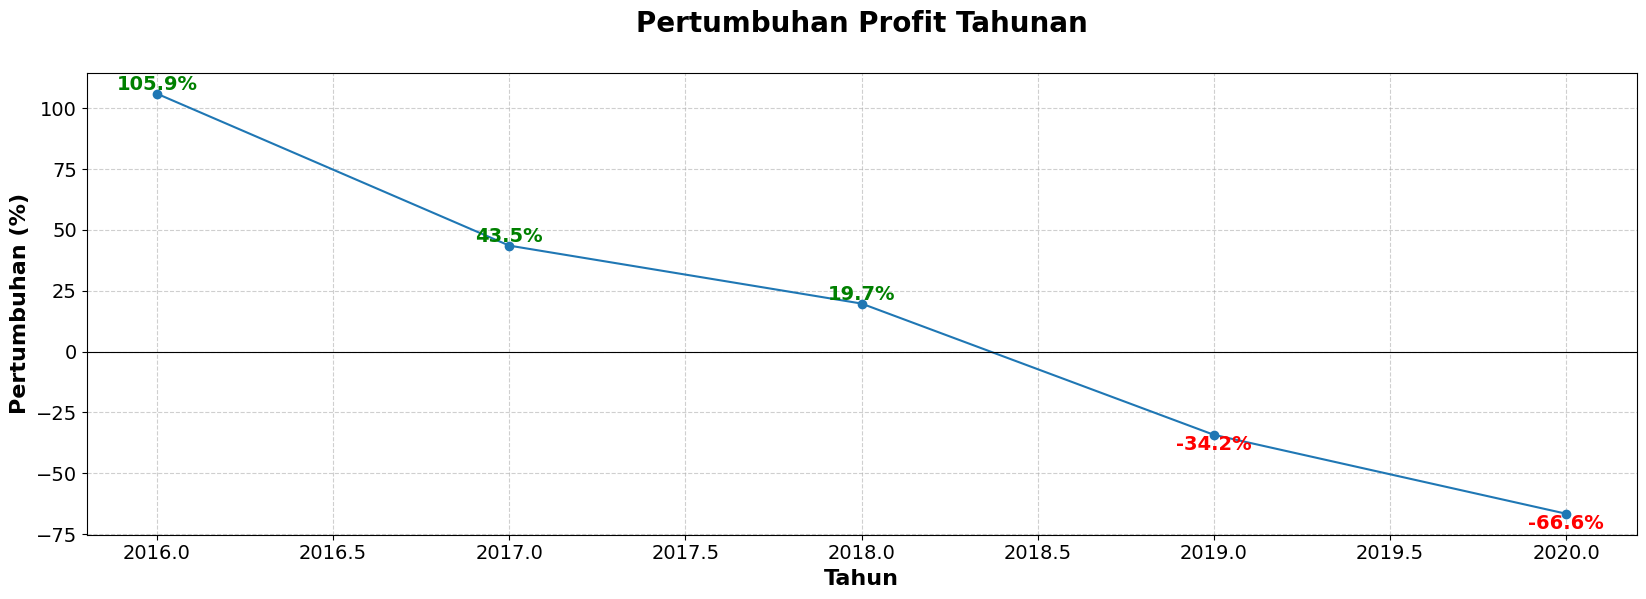

In [ ]:
# Pastikan kolom order_date bertipe datetime
order_clean['order_date'] = pd.to_datetime(order_clean['order_date'])

# Hitung total profit per tahun
profit_tahunan = order_clean.groupby(order_clean['order_date'].dt.year)['profit'].sum()

# Hitung pertumbuhan tahunan (%)
pertumbuhan_profit = profit_tahunan.pct_change() * 100

# Plot
plt.figure(figsize=(20, 6))
plt.plot(profit_tahunan.index, pertumbuhan_profit, marker='o')

# Tambahkan label persentase di titik (font lebih besar)
for i, val in enumerate(pertumbuhan_profit):
    if pd.notnull(val):
        warna = 'green' if val >= 0 else 'red'
        plt.text(profit_tahunan.index[i], val, f"{val:.1f}%",
                 ha='center', va='bottom' if val >= 0 else 'top',
                 color=warna, fontsize=14, fontweight='bold')

# Garis horizontal di 0
plt.axhline(0, color='black', linewidth=0.8)

# Judul dan label sumbu (font lebih besar)
plt.title("Pertumbuhan Profit Tahunan\n", fontsize=20, fontweight='bold')
plt.xlabel("Tahun",  weight='bold', fontsize=16)
plt.ylabel("Pertumbuhan (%)", weight='bold', fontsize=16)

# Perbesar ukuran angka di sumbu X dan Y
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Grid
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

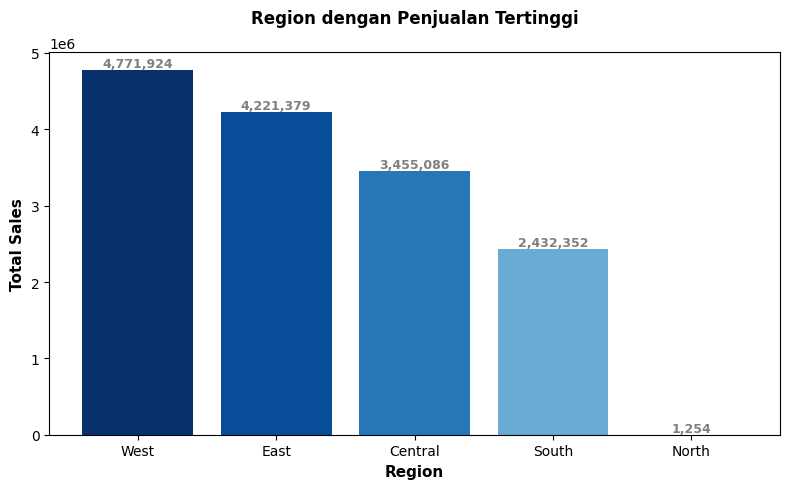

In [ ]:
# Region dengan Penjualan Tertinggi

# Join order dan merchant
df_join_order_merchant = pd.merge(order_clean, df_merchant, left_on='merchant_id', right_on='id', how='left')

# Aggregation total sales per region
sales_per_region = (
    df_join_order_merchant
    .groupby('region')['sales']
    .sum()
    .reset_index()
    .sort_values(by='sales', ascending=False)
)

# Plot bar chart
plt.figure(figsize=(8, 5))

# Buat colormap semakin tinggi makin gelap
norm = plt.Normalize(sales_per_region['sales'].min(), sales_per_region['sales'].max())
colors = plt.cm.Blues(norm(sales_per_region['sales']))

bars = plt.bar(sales_per_region['region'], sales_per_region['sales'], color=colors)

# Tambahkan label jumlah sales di atas bar
for bar, value in zip(bars, sales_per_region['sales']):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{int(value):,}',
        ha='center', va='bottom', fontsize=9, fontweight='bold', color='gray'
    )

# Set title dan axis
plt.title('Region dengan Penjualan Tertinggi\n', fontsize=12, fontweight='bold')
plt.xlabel('Region', fontsize=11, fontweight='bold')
plt.ylabel('Total Sales', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


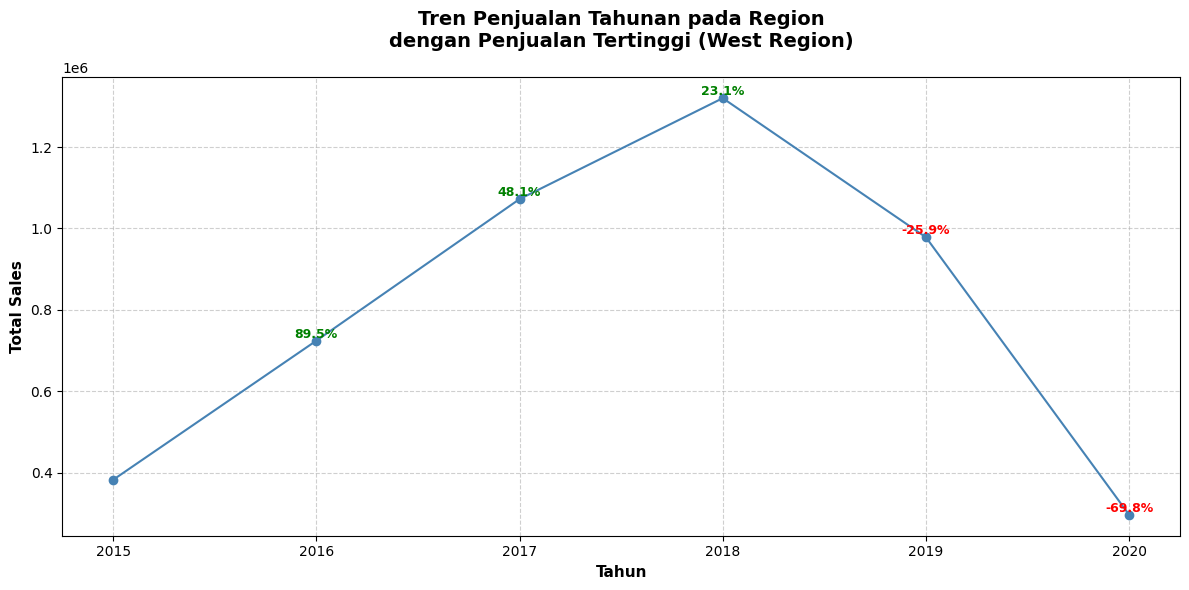

In [ ]:
# Tren Penjualan Tahunan pada Region dengan Penjualan Tertinggi

# Konversi order_date ke datetime
df_join_order_merchant['order_date'] = pd.to_datetime(df_join_order_merchant['order_date'], errors='coerce')

# Filter hanya region West
df_west = df_join_order_merchant[df_join_order_merchant['region'].str.lower() == 'west'].copy()
df_west['year'] = df_west['order_date'].dt.year

# Hitung total sales per tahun
sales_per_year = (
    df_west
    .groupby('year')['sales']
    .sum()
    .reset_index()
    .sort_values('year')
)

# Hitung persentase perubahan tiap tahun
sales_per_year['pct_change'] = sales_per_year['sales'].pct_change() * 100

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(
    sales_per_year['year'],
    sales_per_year['sales'],
    marker='o', linestyle='-', color='steelblue'
)

# Tambahkan label persentase di atas titik
for i in range(1, len(sales_per_year)):
    x = sales_per_year['year'].iloc[i]
    y = sales_per_year['sales'].iloc[i]
    pct = sales_per_year['pct_change'].iloc[i]

    color = 'green' if pct > 0 else 'red'
    plt.text(
        x, y, f'{pct:.1f}%',
        ha='center', va='bottom',
        fontsize=9, fontweight='bold', color=color
    )

# Atur judul & label axis
plt.title(
    "Tren Penjualan Tahunan pada Region\ndengan Penjualan Tertinggi (West Region)\n",
    fontsize=14, fontweight='bold'
)
plt.xlabel('Tahun', fontsize=11, fontweight='bold')
plt.ylabel('Total Sales', fontsize=11, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

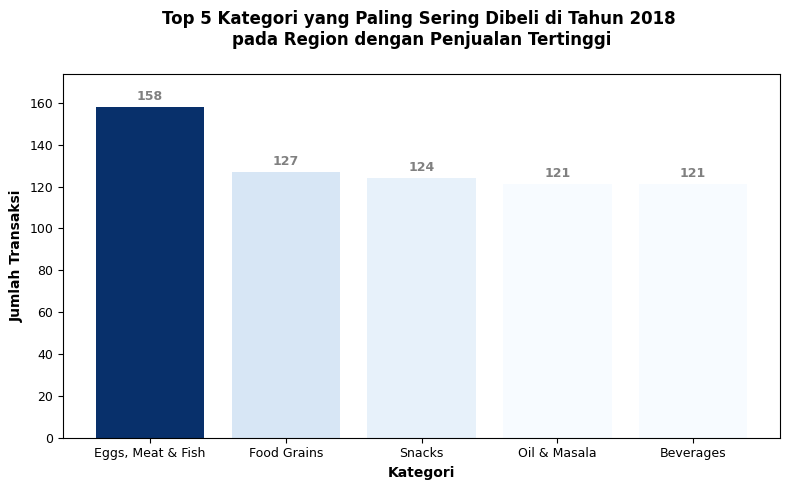

In [ ]:
import matplotlib.cm as cm

# --- Data Preparation ---
df_join_order_merchant['order_date'] = pd.to_datetime(df_join_order_merchant['order_date'], errors='coerce')
df_join_order_merchant['year'] = df_join_order_merchant['order_date'].dt.year

# Filter data tahun 2018
df_2018 = df_join_order_merchant[df_join_order_merchant['year'] == 2018]

# Cari region dengan sales tertinggi
region_sales_2018 = (
    df_2018.groupby('region')['sales']
    .sum()
    .sort_values(ascending=False)
)
top_region = region_sales_2018.idxmax()

# Filter data hanya region tertinggi
df_top_region_2018 = df_2018[df_2018['region'] == top_region].copy()

# Merge dengan kategori
df_merged = pd.merge(
    df_top_region_2018,
    df_category,
    left_on='cat_id',
    right_on='id',
    how='left'
).dropna(subset=['category'])

# Hitung 5 kategori terbanyak
category_counts = (
    df_merged['category']
    .value_counts()
    .nlargest(5)
    .reset_index(name='transaction_count')
    .rename(columns={'index': 'category'})
)

# --- Visualization ---
plt.figure(figsize=(8, 5))

# Gradasi warna: makin tinggi makin gelap
norm = plt.Normalize(category_counts['transaction_count'].min(),
                     category_counts['transaction_count'].max())
colors = cm.Blues(norm(category_counts['transaction_count']))

bars = plt.bar(category_counts['category'],
               category_counts['transaction_count'],
               color=colors)

# Tambahkan label di atas bar
plt.bar_label(bars,
              labels=[f'{y:,.0f}' for y in category_counts['transaction_count']],
              padding=3, fontsize=9, weight='bold', color='gray')

# Judul, label, dan style
plt.ylim(top=category_counts['transaction_count'].max() * 1.1)
plt.xlabel('Kategori', weight='bold', fontsize=10)
plt.ylabel('Jumlah Transaksi', weight='bold', fontsize=10)
plt.title('Top 5 Kategori yang Paling Sering Dibeli di Tahun 2018 \n'
          'pada Region dengan Penjualan Tertinggi\n',
          fontsize=12, weight='bold')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.show()

Region dengan sales tertinggi tahun 2018: West


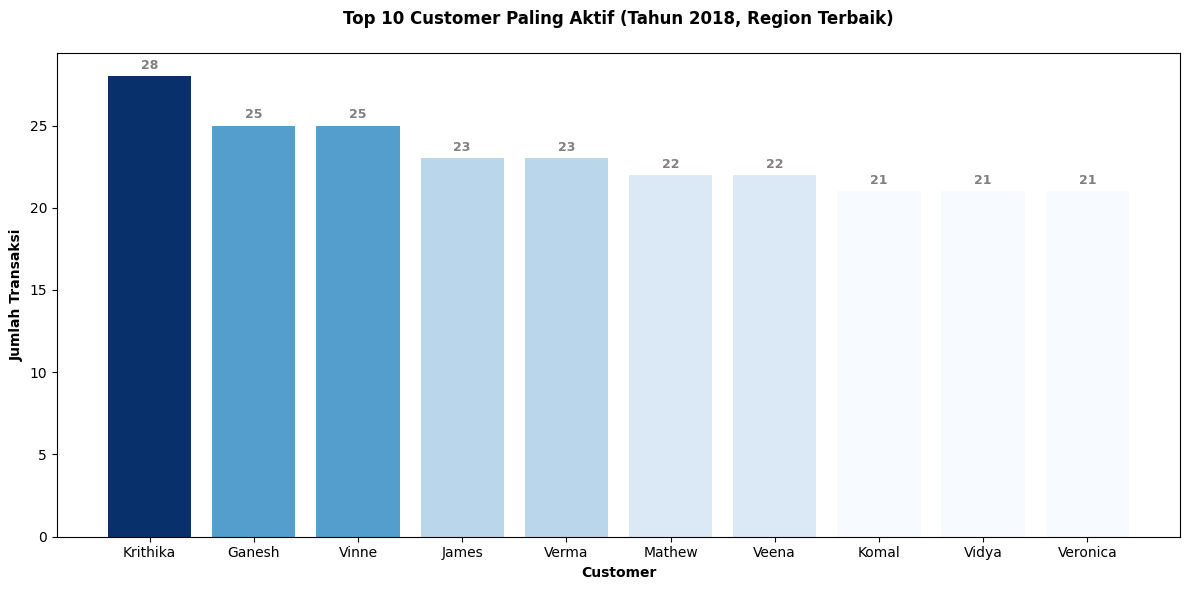

In [ ]:
# Bar Chart 10 customer paling aktif bedasarkan frekuensi transaksi

# --- Preprocessing ---
df_join_order_merchant['order_date'] = pd.to_datetime(df_join_order_merchant['order_date'], errors='coerce')
df_join_order_merchant['year'] = df_join_order_merchant['order_date'].dt.year

# Filter hanya tahun 2018
df_2018 = df_join_order_merchant[df_join_order_merchant['year'] == 2018].copy()

# Cari region dengan sales tertinggi
top_region = (
    df_2018.groupby('region')['sales']
    .sum()
    .sort_values(ascending=False)
    .idxmax()
)
print(f"Region dengan sales tertinggi tahun 2018: {top_region}")

# Ambil data hanya dari region terbaik
df_top_region = df_2018[df_2018['region'] == top_region].copy()

# --- Top 10 Customer Paling Aktif (berdasarkan jumlah transaksi) ---
top_active_customers = (
    df_top_region['customer_id']
    .value_counts()
    .head(10)
    .rename_axis('customer_id')
    .reset_index(name='transaction_count')
)

# Pastikan kolom customer_id dalam string agar bisa join
top_active_customers['customer_id'] = top_active_customers['customer_id'].astype(str)
df_customer['id'] = df_customer['id'].astype(str)

# Merge untuk ambil nama customer
top_active_customers = pd.merge(
    top_active_customers,
    df_customer[['id', 'name']],
    left_on='customer_id',
    right_on='id',
    how='left'
)

# --- Visualisasi ---
import matplotlib as mpl

plt.figure(figsize=(12, 6))

# Warna gradasi: semakin tinggi value semakin gelap
norm = mpl.colors.Normalize(vmin=top_active_customers['transaction_count'].min(),
                            vmax=top_active_customers['transaction_count'].max())
colors = plt.cm.Blues(norm(top_active_customers['transaction_count']))

bars = plt.bar(
    top_active_customers['name'],
    top_active_customers['transaction_count'],
    color=colors
)

# Tambah label angka di atas bar
plt.bar_label(bars, labels=[f"{v:,}" for v in top_active_customers['transaction_count']],
              padding=3, fontsize=9, weight='bold', color='gray')


# Judul & axis
plt.title('Top 10 Customer Paling Aktif (Tahun 2018, Region Terbaik)\n', fontsize=12, weight='bold')
plt.xlabel('Customer', weight='bold')
plt.ylabel('Jumlah Transaksi', weight='bold')
plt.tight_layout()
plt.show()

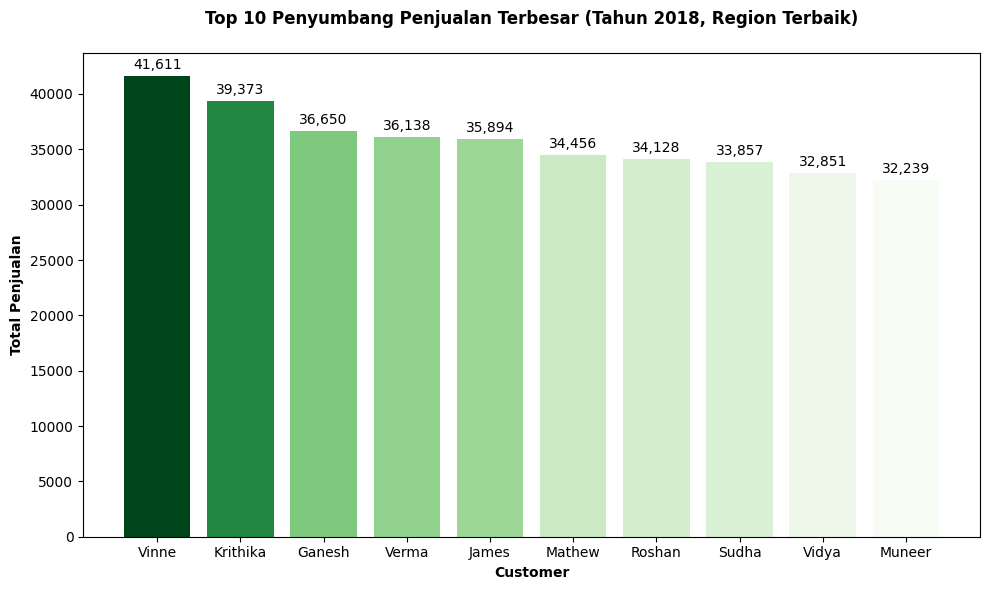

In [ ]:
# Top 10 Penyumbang Penjualan Terbesar (Tahun 2018, Region Terbaik

# --- Top 10 Customer Penyumbang Penjualan ---
top_sales_customers = (
    df_top_region.groupby('customer_id')['sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Merge dengan nama customer
top_sales_customers['customer_id'] = top_sales_customers['customer_id'].astype(str)
top_sales_customers = pd.merge(
    top_sales_customers,
    df_customer[['id', 'name']],
    left_on='customer_id',
    right_on='id',
    how='left'
)

# --- Visualisasi ---
plt.figure(figsize=(10, 6))

# Normalisasi value untuk gradasi warna
norm = mpl.colors.Normalize(vmin=top_sales_customers['sales'].min(),
                            vmax=top_sales_customers['sales'].max())
colors = plt.cm.Greens(norm(top_sales_customers['sales']))

bars = plt.bar(
    top_sales_customers['name'],
    top_sales_customers['sales'],
    color=colors
)

# Tambah label angka di atas bar
plt.bar_label(bars, labels=[f"{v:,.0f}" for v in top_sales_customers['sales']], padding=3)

# Judul & axis
plt.title('Top 10 Penyumbang Penjualan Terbesar (Tahun 2018, Region Terbaik)\n', fontsize=12, weight='bold')
plt.xlabel('Customer', weight='bold')
plt.ylabel('Total Penjualan', weight='bold')
plt.tight_layout()
plt.show()

Region dengan sales tertinggi tahun 2018: West
    month     sales  MoM_Growth
0       1  108125.0         NaN
1       2  175460.0   62.275145
2       3  144057.0  -17.897527
3       4   99922.0  -30.637178
4       5  114732.0   14.821561
5       6  131260.0   14.405746
6       7  103115.0  -21.442176
7       8   77476.0  -24.864472
8       9  104618.0   35.032784
9      10   80963.0  -22.610832
10     11   89439.0   10.468980
11     12   90896.0    1.629043


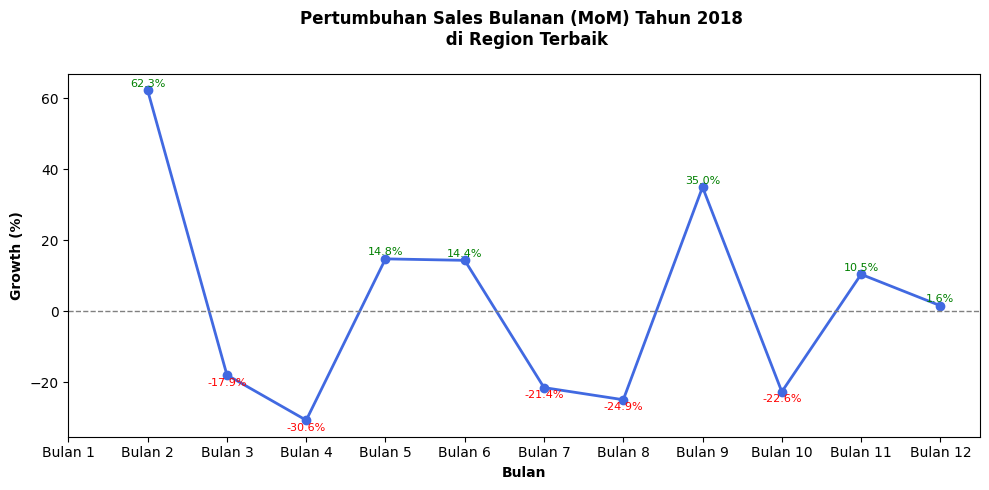

In [ ]:
import matplotlib.pyplot as plt

# Pastikan order_date sudah datetime dan ada kolom year
df_join_order_merchant['order_date'] = pd.to_datetime(df_join_order_merchant['order_date'], errors='coerce')
df_join_order_merchant['year'] = df_join_order_merchant['order_date'].dt.year
df_join_order_merchant['month'] = df_join_order_merchant['order_date'].dt.month

# Filter hanya tahun 2018
df_2018 = df_join_order_merchant[df_join_order_merchant['year'] == 2018].copy()

# Cari region dengan sales tertinggi
top_region = (
    df_2018.groupby('region')['sales']
    .sum()
    .sort_values(ascending=False)
    .idxmax()
)
print(f"Region dengan sales tertinggi tahun 2018: {top_region}")

# Ambil data hanya dari region terbaik
df_top_region = df_2018[df_2018['region'] == top_region].copy()

# Hitung total sales per bulan
monthly_sales = (
    df_top_region.groupby('month')['sales']
    .sum()
    .reset_index()
    .sort_values('month')
)

# Hitung Growth MoM
monthly_sales['MoM_Growth'] = monthly_sales['sales'].pct_change() * 100

print(monthly_sales)

# --- Visualisasi ---
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales['month'], monthly_sales['MoM_Growth'], marker='o', color='royalblue', linewidth=2)

# Tambah garis nol
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Tambah label angka di setiap titik dengan warna sesuai kondisi
for i, v in enumerate(monthly_sales['MoM_Growth']):
    if pd.notna(v):
        color = 'green' if v >= 0 else 'red'
        plt.text(
            monthly_sales['month'].iloc[i],
            v + (1 if v >= 0 else -3),  # posisikan teks sedikit ke atas/bawah sesuai tanda
            f"{v:.1f}%",
            ha='center',
            fontsize=8,
            color=color
        )

# Judul & axis
plt.title('Pertumbuhan Sales Bulanan (MoM) Tahun 2018 \n di Region Terbaik\n', fontsize=12, weight='bold')
plt.xlabel('Bulan', weight='bold')
plt.ylabel('Growth (%)', weight='bold')
plt.xticks(monthly_sales['month'], [f"Bulan {m}" for m in monthly_sales['month']])
plt.tight_layout()
plt.show()

## 🛠 Feature Engineering

In [ ]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Feature Engineering ---
# Agregasi per customer_id
df_features = order_clean.groupby("customer_id").agg(
    total_orders=("order_id", "count"),
    total_sales=("sales", "sum"),
    average_discount=("discount", "mean"),
    total_profit=("profit", "sum"),
    first_order_date=("order_date", "min"),
    last_order_date=("order_date", "max")
).reset_index()

# Lama hubungan (loyalty)
df_features["customer_lifetime_days"] = (
    df_features["last_order_date"] - df_features["first_order_date"]
).dt.days

# Rata-rata per transaksi
df_features["sales_per_order"] = df_features["total_sales"] / df_features["total_orders"]
df_features["profit_per_order"] = df_features["total_profit"] / df_features["total_orders"]

# Profit margin
df_features["profit_margin"] = df_features["total_profit"] / df_features["total_sales"]

df_features

,customer_id,total_orders,total_sales,average_discount,total_profit,first_order_date,last_order_date,customer_lifetime_days,sales_per_order,profit_per_order,profit_margin
0,C0001,203,311671.0,0.223300,77498.23,2015-01-08,2020-07-03,2003,1535.325123,381.764680,0.248654
1,C0002,187,299674.0,0.223904,78439.05,2015-01-11,2020-06-04,1971,1602.534759,419.460160,0.261748
2,C0003,195,306936.0,0.225436,81883.90,2015-01-03,2020-06-09,1984,1574.030769,419.917436,0.266778
3,C0004,198,294397.0,0.229192,74410.23,2015-01-08,2020-06-12,1982,1486.853535,375.809242,0.252755
4,C0005,225,330306.0,0.226044,79503.06,2015-01-06,2020-06-10,1982,1468.026667,353.346933,0.240695
5,C0006,195,300939.0,0.230974,78930.91,2015-01-10,2020-06-12,1980,1543.276923,404.773897,0.262282
6,C0007,186,283735.0,0.221129,70238.28,2015-01-04,2020-06-16,1990,1525.456989,377.625161,0.247549
7,C0008,217,324184.0,0.222166,86988.72,2015-01-07,2020-07-07,2008,1493.935484,400.869677,0.268331
8,C0009,201,290802.0,0.222587,70455.93,2015-01-03,2020-06-06,1981,1446.776119,350.527015,0.242281
9,C0010,189,283656.0,0.232169,69588.12,2015-02-03,2020-07-07,1981,1500.825397,368.191111,0.245326


## 🎯 Data Preprocessing - Building the Feature Array

In [ ]:
# Siapkan fitur untuk model (hapus tanggal)
features_for_model = df_features.drop(columns=[
    "customer_id",        # identifier, tidak dipakai
    "first_order_date",   # bukan fitur numerik
    "last_order_date",    # bukan fitur numerik
    "total_profit"        # hanya intermediate feature
])

### ----feature yang digunakan ---- ###
#total_orders
#total_sales
#average_discount
#customer_lifetime_days
#sales_per_order
#profit_per_order
#profit_margin

print("Dataset Ready untuk model fitting:")
features_for_model

Dataset Ready untuk model fitting:


,total_orders,total_sales,average_discount,customer_lifetime_days,sales_per_order,profit_per_order,profit_margin
0,203,311671.0,0.223300,2003,1535.325123,381.764680,0.248654
1,187,299674.0,0.223904,1971,1602.534759,419.460160,0.261748
2,195,306936.0,0.225436,1984,1574.030769,419.917436,0.266778
3,198,294397.0,0.229192,1982,1486.853535,375.809242,0.252755
4,225,330306.0,0.226044,1982,1468.026667,353.346933,0.240695
5,195,300939.0,0.230974,1980,1543.276923,404.773897,0.262282
6,186,283735.0,0.221129,1990,1525.456989,377.625161,0.247549
7,217,324184.0,0.222166,2008,1493.935484,400.869677,0.268331
8,201,290802.0,0.222587,1981,1446.776119,350.527015,0.242281
9,189,283656.0,0.232169,1981,1500.825397,368.191111,0.245326



## 🎯 Data Preprocessing - Scaling the features

In [ ]:
#Scale the features here
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
# Fit & transform dataset model (hasil dari feature engineering sebelumnya)
X_scaled = scaler.fit_transform(features_for_model)

# Konversi kembali ke DataFrame agar rapi
df_scaled = pd.DataFrame(X_scaled, columns=features_for_model.columns, index=features_for_model.index)

print("Data setelah MinMax Scaling:")
df_scaled

Data setelah MinMax Scaling:


,total_orders,total_sales,average_discount,customer_lifetime_days,sales_per_order,profit_per_order,profit_margin
0,0.568627,0.762130,0.365556,0.865169,0.645980,0.536258,0.517150
1,0.254902,0.608991,0.388797,0.505618,1.000000,0.994442,0.812919
2,0.411765,0.701689,0.447824,0.651685,0.849858,1.000000,0.926548
3,0.470588,0.541632,0.592528,0.629213,0.390662,0.463870,0.609779
4,1.000000,1.000000,0.471269,0.629213,0.291493,0.190844,0.337376
5,0.411765,0.625139,0.661198,0.606742,0.687866,0.815932,0.824984
6,0.235294,0.405535,0.281899,0.719101,0.594001,0.485943,0.492188
7,0.843137,0.921854,0.321845,0.921348,0.427965,0.768477,0.961625
8,0.529412,0.495743,0.338071,0.617978,0.179558,0.156568,0.373207
9,0.294118,0.404526,0.707235,0.617978,0.464257,0.371273,0.441972


## 🎯 Data Preprocessing - Analyzing the Features using PCA

In [ ]:
# PCA fitting here, PCA into 2D
from sklearn.decomposition import PCA


# --- Step 1: PCA ke 2 dimensi ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(df_scaled)

# --- Step 2: Buat DataFrame hasil PCA ---
df_pca = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"], index=df_scaled.index)
df_pca

,PCA1,PCA2
0,0.163327,0.231709
1,0.739891,-0.147190
2,0.762979,-0.021695
3,-0.012211,-0.067923
4,-0.309496,0.670979
5,0.468368,-0.081036
6,0.048063,-0.238204
7,0.526938,0.385982
8,-0.408123,-0.004172
9,-0.182351,-0.234532


Loadings (kontribusi fitur pada PCA):
                            PCA1      PCA2
total_orders           -0.017112  0.652553
total_sales             0.162190  0.703250
average_discount       -0.157820 -0.065983
customer_lifetime_days  0.053023  0.057884
sales_per_order         0.379626  0.150348
profit_per_order        0.685056 -0.078386
profit_margin           0.576424 -0.207753

Fitur dengan importance terbesar hingga terkecil:
total_sales               0.865440
profit_margin             0.784177
profit_per_order          0.763442
total_orders              0.669665
sales_per_order           0.529974
average_discount          0.223803
customer_lifetime_days    0.110908
dtype: float64

Fitur yang paling low kontribusinya (consider untuk di-drop): customer_lifetime_days


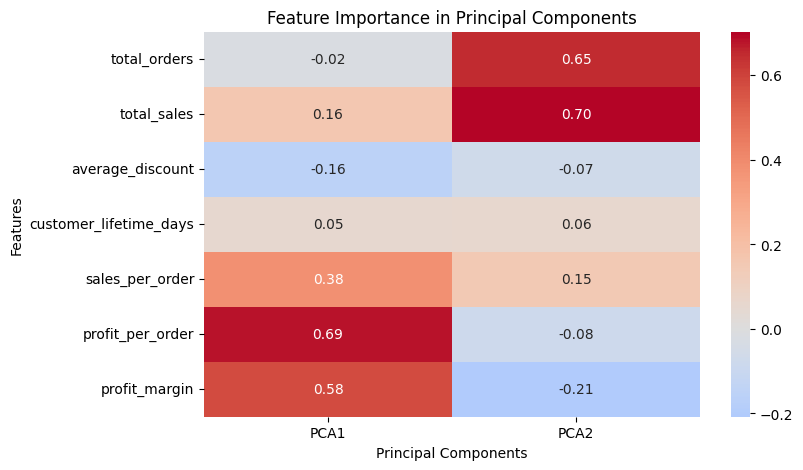


Dataset setelah drop fitur terendah:


,total_orders,total_sales,average_discount,sales_per_order,profit_per_order,profit_margin
0,0.568627,0.762130,0.365556,0.645980,0.536258,0.517150
1,0.254902,0.608991,0.388797,1.000000,0.994442,0.812919
2,0.411765,0.701689,0.447824,0.849858,1.000000,0.926548
3,0.470588,0.541632,0.592528,0.390662,0.463870,0.609779
4,1.000000,1.000000,0.471269,0.291493,0.190844,0.337376
5,0.411765,0.625139,0.661198,0.687866,0.815932,0.824984
6,0.235294,0.405535,0.281899,0.594001,0.485943,0.492188
7,0.843137,0.921854,0.321845,0.427965,0.768477,0.961625
8,0.529412,0.495743,0.338071,0.179558,0.156568,0.373207
9,0.294118,0.404526,0.707235,0.464257,0.371273,0.441972


In [ ]:
# Feature Importance from PCA here

import seaborn as sns
import matplotlib.pyplot as plt

# --- Lihat loading scores (importance tiap feature) ---
loadings = pd.DataFrame(
    pca.components_.T,
    index=df_scaled.columns,
    columns=["PCA1", "PCA2"]
)

print("Loadings (kontribusi fitur pada PCA):")
print(loadings)

# --- Step 4: Lihat importance fitur (berdasarkan absolute value loadings) ---
importance = loadings.abs().sum(axis=1).sort_values(ascending=False)
print("\nFitur dengan importance terbesar hingga terkecil:")
print(importance)

# --- Step 5: Tentukan fitur yang perlu di-drop ---
least_important_feature = importance.idxmin()
print(f"\nFitur yang paling low kontribusinya (consider untuk di-drop): {least_important_feature}")


# --- DataFrame loadings (sudah dihitung sebelumnya) ---
loadings = pd.DataFrame(
    pca.components_.T,
    index=df_scaled.columns,
    columns=["PCA1", "PCA2"]
)

## Visualisasi Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Feature Importance in Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Features")
plt.show()


# --- Drop fitur terendah dari dataset scaled ---
df_scaled_reduced = df_scaled.drop(columns=[least_important_feature])

print("\nDataset setelah drop fitur terendah:")
df_scaled_reduced


## 🤖 Predictive Modeling - Elbow Method

In [ ]:
def elbow_method(df_scaled_reduced
, max_k=10):
    """
    Implementasi Elbow Method untuk menentukan jumlah cluster optimal
    """
    inertias = []
    k_range = range(1, max_k + 1)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df_scaled_reduced
)
        inertias.append(kmeans.inertia_)

    return k_range, inertias

# Jalankan elbow method
k_range, inertias = elbow_method(X_pca, max_k=10)

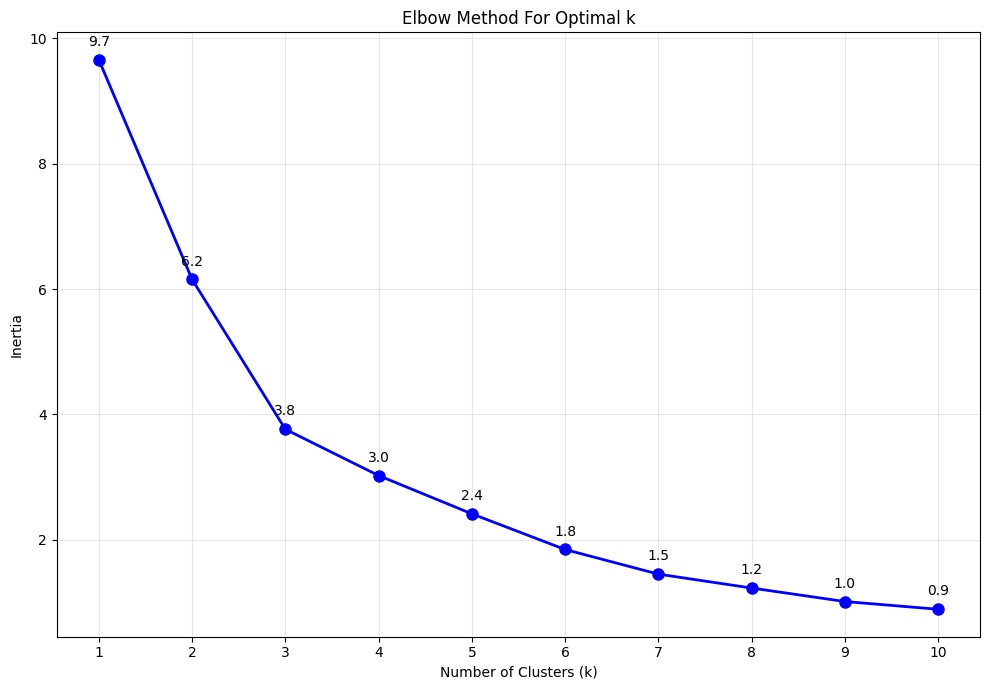


Inertia changes:
k=2: 3.50
k=3: 2.39
k=4: 0.74
k=5: 0.61
k=6: 0.57
k=7: 0.39
k=8: 0.22
k=9: 0.22
k=10: 0.12


In [ ]:
# Visualisasi Elbow Method
plt.figure(figsize=(10, 7))
plt.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)

# Tambahkan keterangan untuk elbow point
for i, (k, inertia) in enumerate(zip(k_range, inertias)):
    plt.annotate(f'{inertia:.1f}', (k, inertia),
                textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Hitung perubahan inertia untuk identifikasi elbow
changes = [inertias[i-1] - inertias[i] for i in range(1, len(inertias))]
print("\nInertia changes:")
for i, change in enumerate(changes, 2):
    print(f"k={i}: {change:.2f}")


## 🤖 Predictive Modeling - Fitting K Means

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Berdasarkan elbow method, pilih k optimal
optimal_k = 3  # disesuaikan berdasarkan hasil elbow method sebelumnya

# Fit K-Means dengan k optimal
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_pca)

# Tambahkan cluster labels ke DataFrame
df_pca['cluster'] = cluster_labels
df_features['cluster'] = cluster_labels


print(f"\nClustering Results:")
print(f"Optimal k: {optimal_k}")
print(f"Inertia: {kmeans_final.inertia_:.2f}")

# Distribusi cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print(f"\nCluster Distribution:")
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} customers ({count/len(cluster_labels)*100:.1f}%)")


Clustering Results:
Optimal k: 3
Inertia: 3.76

Cluster Distribution:
Cluster 0: 16 customers (32.0%)
Cluster 1: 15 customers (30.0%)
Cluster 2: 19 customers (38.0%)


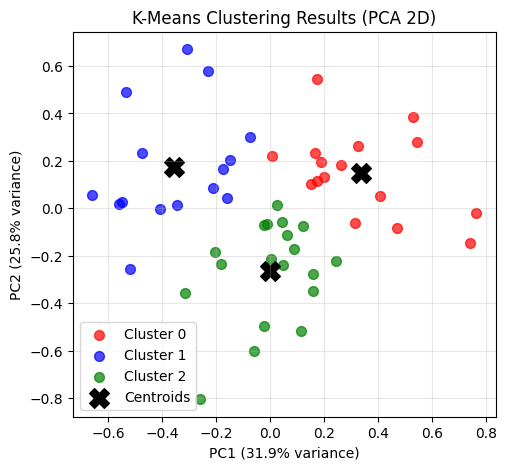

In [ ]:
# Plot hasil clustering pada ruang PCA 2D
plt.figure(figsize=(12, 5))

# Plot 1: Clustering Results
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
for i in range(optimal_k):
    cluster_data = df_pca[df_pca['cluster'] == i]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                c=colors[i], label=f'Cluster {i}', alpha=0.7, s=50)

# Plot centroids
centroids_pca = kmeans_final.cluster_centers_
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
           c='black', marker='X', s=200, label='Centroids')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
plt.title('K-Means Clustering Results (PCA 2D)')
plt.legend()
plt.grid(True, alpha=0.3)

## 🤖 Predictive Modeling - Cluster Interpretation using Centroid Mean and Standard Deviation

In [ ]:
# # Analisis karakteristik setiap cluster
# Analisis karakteristik setiap cluster
cluster_profile = df_features.groupby('cluster')[features_for_model.columns.tolist()].agg(['mean', 'std', 'count'])
print("\nCluster Profiling:")

# Hitung ringkasan statistik per cluster
cluster_summary = df_features.groupby('cluster').agg({
    'total_profit': 'mean',
    'profit_per_order': 'mean',
    'profit_margin': 'mean',
    'total_orders': 'mean',
    'total_sales': 'mean'
}).reset_index()

# Dapatkan rata-rata seluruh data sebagai pembanding
avg_profit = df_features['total_profit'].mean()
avg_margin = df_features['profit_margin'].mean()
avg_orders = df_features['total_orders'].mean()

interpretations = []

for _, row in cluster_summary.iterrows():
    cluster_id = row['cluster']

    # Tentukan level profit
    profit_level = "HIGH" if row['total_profit'] > avg_profit else "LOW"

    # Tentukan level margin
    margin_level = "HIGH" if row['profit_margin'] > avg_margin else "LOW"

    # Tentukan level order volume
    order_level = "HIGH" if row['total_orders'] > avg_orders else "LOW"

    # Strategi berdasarkan kombinasi
    if profit_level == "HIGH" and margin_level == "HIGH":
        strategy = "SUSTAIN PROFIT → fokus loyalitas & upselling"
    elif profit_level == "HIGH" and margin_level == "LOW":
        strategy = "RESTORE MARGIN → dorong produk premium"
    elif profit_level == "LOW" and margin_level == "HIGH":
        strategy = "BOOST VOLUME → tingkatkan frekuensi pembelian"
    else:
        strategy = "RESTORE PROFIT → optimasi diskon & reaktivasi pelanggan"

    interpretations.append({
        'Cluster': cluster_id,
        'Avg_Total_Profit': round(row['total_profit'], 2),
        'Avg_Profit_per_Order': round(row['profit_per_order'], 2),
        'Avg_Profit_Margin': round(row['profit_margin'], 3),
        'Avg_Total_Orders': round(row['total_orders'], 2),
        'Profit_Level': profit_level,
        'Margin_Level': margin_level,
        'Order_Volume_Level': order_level,
        'Strategy': strategy
    })

# Buat dataframe hasil interpretasi
df_interpretation = pd.DataFrame(interpretations)

# Tampilkan hasil interpretasi
print(df_interpretation)



Cluster Profiling:
   Cluster  Avg_Total_Profit  Avg_Profit_per_Order  Avg_Profit_Margin  \
0      0.0          79781.10                393.39              0.257   
1      1.0          72491.93                354.24              0.239   
2      2.0          71808.55                376.55              0.254   

   Avg_Total_Orders Profit_Level Margin_Level Order_Volume_Level  \
0            202.94         HIGH         HIGH               HIGH   
1            204.60          LOW          LOW               HIGH   
2            190.68          LOW         HIGH                LOW   

                                            Strategy  
0       SUSTAIN PROFIT → fokus loyalitas & upselling  
1  RESTORE PROFIT → optimasi diskon & reaktivasi ...  
2      BOOST VOLUME → tingkatkan frekuensi pembelian  


**Kesimpulan & Insight Berdasarkan Profil Cluster**

Cluster 0 — HIGH Profit, HIGH Margin → SUSTAIN PROFIT
Karakteristik

Profit dan margin jauh di atas rata-rata.
Pelanggan cenderung membeli produk bernilai tinggi dengan konsistensi yang baik.

Insight :
Segmen ini adalah pelanggan inti (loyal & menguntungkan).

Rekomendasi Strategi
Pertahankan loyalitas dengan program membership atau reward point.
Lakukan upselling ke produk premium untuk menjaga margin tetap tinggi.
Kirimkan penawaran personalisasi berbasis histori pembelian.

Cluster 1 — HIGH Profit, LOW Margin → RESTORE MARGIN
Karakteristik :

Profit tinggi karena volume pembelian besar.
Margin rendah, kemungkinan karena diskon besar atau biaya operasional tinggi.

Insight :

Pelanggan ini penting, tapi sensitif terhadap harga dan diskon.
Rekomendasi Strategi
Perkenalkan bundling produk bernilai margin tinggi.
Kurangi ketergantungan pada diskon besar, ganti dengan value-added service.
Efisiensi biaya operasional agar margin meningkat tanpa kehilangan pelanggan.

Cluster 2 — LOW Profit, LOW Margin → RESTORE PROFIT
Karakteristik

Profit dan margin sama-sama di bawah rata-rata.
Volume pembelian juga rendah.

Insight :

Segmen ini kurang menguntungkan, berpotensi menjadi churn.
Rekomendasi Strategi
Jalankan reaktivasi kampanye (email, SMS, push notification).
Gunakan promo terbatas untuk menarik kembali minat.

Dorong cross-selling produk yang lebih menguntungkan.
Jika respon rendah, alihkan fokus ke segmen yang lebih potensial.
